In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('datasets//Data Science Salary 2021 to 2023.csv')

In [3]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L
...,...,...,...,...,...,...,...,...,...
3756,2020,SE,FT,Principal Data Scientist,130000,EUR,148261,DE,M
3757,2020,SE,FT,Data Scientist,80000,EUR,91237,AT,S
3758,2020,SE,FT,Data Science Manager,190200,USD,190200,US,M
3759,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,S


In [4]:
df.info

<bound method DataFrame.info of       work_year experience_level employment_type                  job_title  \
0          2023               EN              FT          Applied Scientist   
1          2023               EN              FT          Applied Scientist   
2          2023               EN              FT       Data Quality Analyst   
3          2023               EN              FT    Compliance Data Analyst   
4          2023               EN              FT          Applied Scientist   
...         ...              ...             ...                        ...   
3756       2020               SE              FT   Principal Data Scientist   
3757       2020               SE              FT             Data Scientist   
3758       2020               SE              FT       Data Science Manager   
3759       2020               SE              FT  Machine Learning Engineer   
3760       2020               SE              FT             Data Scientist   

      salary salary

<h1>Part 2: Exploratory Data Analysis (EDA)

<h2>1. How many unique job titles are there?

In [5]:
# Your EDA code here
df.groupby(['work_year'])['salary_in_usd'].mean()

work_year
2020     92302.631579
2021     94087.208696
2022    133379.510804
2023    148954.558413
Name: salary_in_usd, dtype: float64

<h2>The average salary per work year increases througout the year

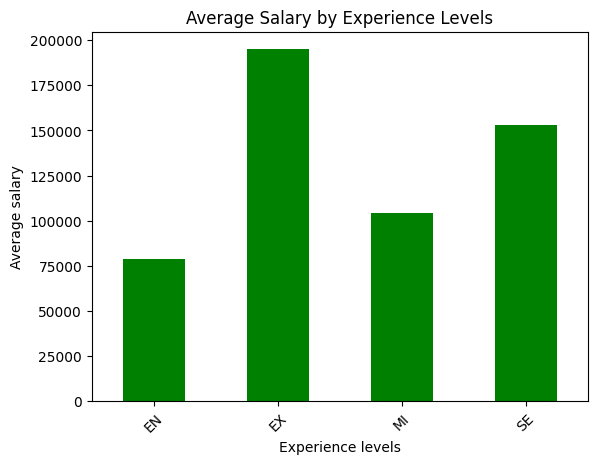

In [6]:
salary_per_exp = df.groupby(['experience_level'])['salary_in_usd'].mean()
salary_per_exp.plot(kind='bar',color='green')

plt.title('Average Salary by Experience Levels')
plt.xlabel('Experience levels')
plt.ylabel('Average salary')
plt.xticks(rotation=45)
plt.show()

<h2>🧹 Part 3: Data Preprocessing for Linear Regression
We will predict salary_in_usd using only numerical or encoded categorical features.

<h2/>Steps:
Select features: work_year, experience_level, and optionally job_title (you decide!)
Encode categorical variables (experience_level) using LabelEncoder or pd.get_dummies()
Define X (features) and y (target = salary_in_usd)
<h2>⚠️ Important: Do NOT include salary, salary_currency, or salary_in_usd in your features!<h2>

In [11]:
le = LabelEncoder()
df['experience_level_encoded'] = le.fit_transform(df['experience_level'])

features = ['work_year', 'experience_level_encoded']
X = df[features]
y = df['salary_in_usd']

X.head()

,work_year,experience_level_encoded
0,2023,0
1,2023,0
2,2023,0
3,2023,0
4,2023,0


<h2>Part 4: Train a Linear Regression Model

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R² Score: 0.15
RMSE: 59164.82


<h2>Part 5: Predict 2024 Salaries

In [14]:
print(le.classes_)

future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3]  # EN, MI, SE, EX (adjust if needed)
})

predicted_salaries = model.predict(future_data)

results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})

results


['EN' 'EX' 'MI' 'SE']


,Experience Level,Predicted 2024 Salary (USD)
0,Entry,111694.914909
1,Mid,131967.434578
2,Senior,152239.954247
3,Executive,172512.473916


<h1>Part 6: Reflection 

<h1>1.Does your model make reasonable predictions? Why or why not?


<h2> Yes, The model predicts salaries rather accurately, as they rise with expertise and years of employment. The model is extremely basic, though, thus the forecasts are not particularly accurate.

<h1> 2.What are the limitations of using only work_year and experience_level?

<h2>Using only work_year and experience_level has some limitations. It ignores other important factors like job title, location, or skills, which can also affect salary.

<h1> 3.How could you improve this model? (Think: more features, better encoding, etc.)

<h2>In order to use it with a different set of codes, the remaining values are condensed into a different dataframe.

<H1> 4.Why is R² not enough to trust your predictions?

<h2>According to my research, R2 has a weak exploratory power, thus I can't completely trust or rely on its predictions.